In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.0.dev81+ga8bd4cf3 anndata==0.8.0 umap==0.5.2 numpy==1.21.6 scipy==1.7.3 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [3]:
i  = 't_CD8-CXCL13'

In [4]:
adata = sc.read_h5ad('./data/Tcell_PDL1.h5ad')

In [5]:
adata = adata[adata.obs['Sub_Cluster']== i]
adata

View of AnnData object with n_obs × n_vars = 5404 × 27085
    obs: 'CellName', 'ID', 'Sample', 'Patient', 'group', 'Tissue', 'Origin', 'Response', 'Timeline', 'Treatment', 'batch', 'n_genes', 'percent_mito', 'percent_hsp', 'percent_ig', 'percent_rp', 'n_counts', 'leiden', 'Louvain', 'myleiden', 'defcls', 'Global_Cluster', 'Sub_Cluster', 'Global_tSNE_1', 'Global_tSNE_2', 'Global_UMAP_1', 'Global_UMAP_2', 'Sub_tSNE_1', 'Sub_tSNE_2', 'Sub_UMAP_1', 'Sub_UMAP_2'

In [6]:
sc.pp.normalize_total(adata,target_sum=1e6)

normalizing counts per cell
    finished (0:00:00)


/Users/liupeiwen/python/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
sc.pp.log1p(adata)

In [8]:
adata.raw = adata 

In [9]:
adata.to_df()

,AL627309.1,AL669831.5,FAM87B,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,...,AL121890.4,LINC01923,AL031770.1,AL445224.1,STPG3,AP001189.4,AC011595.1,TRDJ3,GOLGA6L1,AC008569.1
ACACCCTAGGAGTTGC.Pre_P007_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.619679,6.311011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTGATGCAATGGATA.Pre_P007_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGTCTTTCACATTAGC.Pre_P007_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,6.802321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCGGGTTCACGGTAGA.Pre_P007_t,0.0,0.0,0.0,0.0,5.023658,0.0,0.0,0.000000,6.809919,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTAACGTGTGTCGCTG.Pre_P007_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7.541279,6.848663,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCAGGTAGTGTTTGGT.Pre_P004_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,7.945265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCCCGATTCCGGGTGT.Pre_P004_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5.876313,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCTCTAATCTATCGCC.Pre_P004_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5.640429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGGCGCACAAACAACA.Pre_P004_t,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ann = pd.read_csv('./result/cluster/'+i+'_cluster.csv',
                  index_col=0,header=0,sep=',',
                 usecols=['cell','cluster'])
ann

,cluster
cell,
AACTCAGAGCAGCGTA.Pre_P012_t,5
ACGGGCTTCTGCAGTA.Pre_P012_t,5
ACTTTCATCCGTCAAA.Pre_P012_t,5
AGTGTCAAGATGTCGG.Pre_P012_t,5
ATAGACCGTAAACACA.Pre_P012_t,5
...,...
CGATTGATCAGTCCCT.Post_P019_t,58
CTCAGAACAGCCAATT.Post_P019_t,58
GTAACGTAGAGCAATT.Post_P019_t,58


In [11]:
adata.obs = adata.obs.join(ann)

In [12]:
adata.obs['cluster'] = adata.obs['cluster'].astype('category')

In [13]:
sc.tl.rank_genes_groups(adata, 'cluster',n_genes=adata.raw.shape[1])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/Users/liupeiwen/python/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/liupeiwen/python/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/liupeiwen/python/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWa

In [16]:
adata.obs['cluster'] = adata.obs['cluster'].astype('string')

In [17]:
adata.obs['cluster'] = adata.obs['cluster'].astype('category')

In [22]:
gene = ['TYMS','TK1','MKI67','']

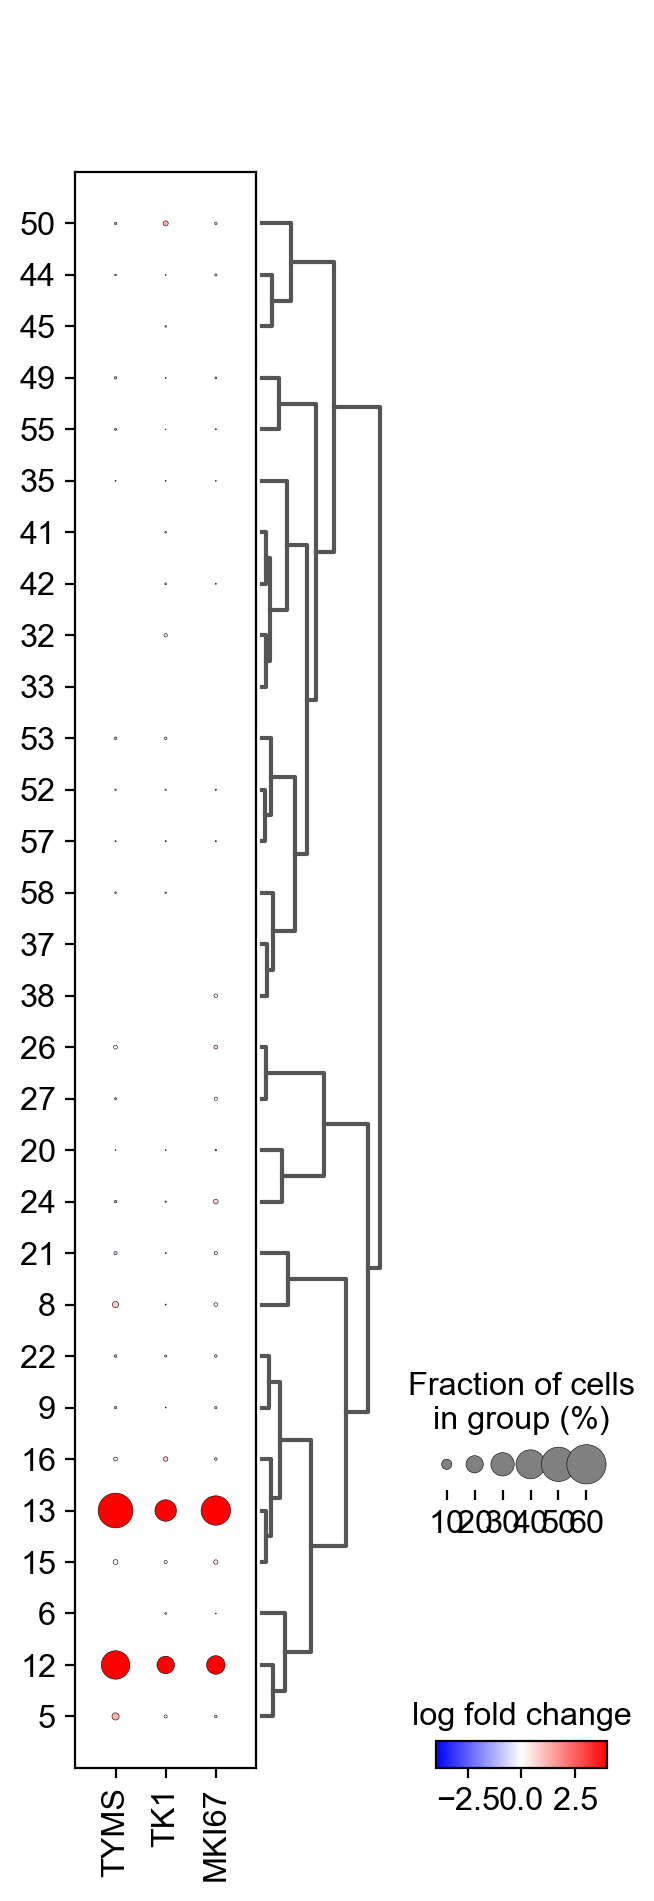

In [23]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    var_names=gene,
    values_to_plot="logfoldchanges", cmap='bwr',
    vmin=-4,
    vmax=4,
    min_logfoldchange=1,
    colorbar_title='log fold change'
)